In [1]:
import pandas as pd
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

os.listdir()

jobs = pd.read_excel('jobsandschools.xlsx', sheet_name=0).set_index(
    'Unnamed: 0').fillna(0).replace('X', 1).T

schools = pd.read_excel('jobsandschools.xlsx', sheet_name=1).set_index(
    'Unnamed: 0').fillna(0).replace('X', 1).T


In [2]:
def generate_kmeans_curve(data):

    Sum_of_squared_distances = []
    K = range(1,6)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(data)
        Sum_of_squared_distances.append(km.inertia_)

    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

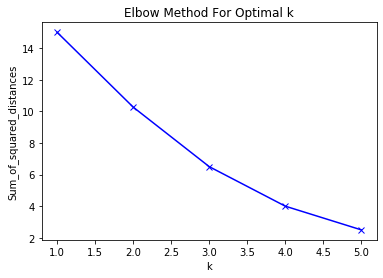

In [3]:
generate_kmeans_curve(schools)

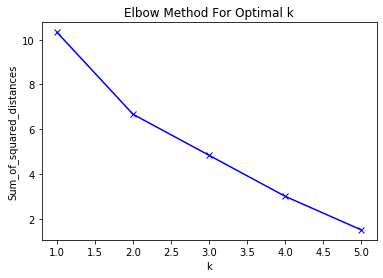

In [4]:
generate_kmeans_curve(jobs)

In [5]:
def fit_pca(data, model):
    output = model(n_components = 2).fit_transform(data)
    #output = model.transform(data)
    return pd.DataFrame(output, index = data.index)
    

def scatter(data, name, cluster_assignments):
    ax = data.plot.scatter(0, 1, c = [{0:'red', 1:'blue', 2:'green'}[c] for c in cluster_assignments])
    for i, txt in enumerate(data.index):
        ax.annotate(txt, (data.iloc[i, 0], data.iloc[i, 1]))
    plt.title(name)
    plt.savefig(name + '.png')
    plt.show()

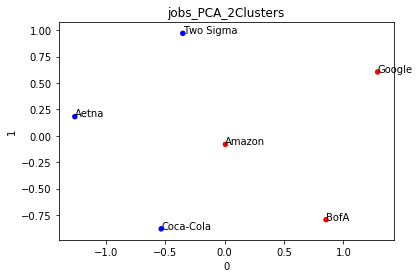

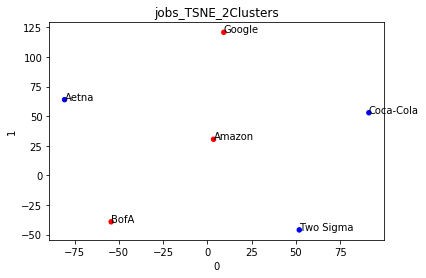

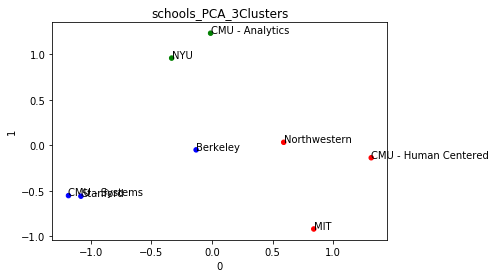

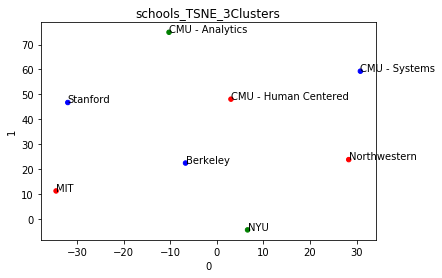

In [6]:
for raw_data, source_name, n_clusters in zip([jobs, schools], ['jobs', 'schools'], [2, 3]):
    cluster_assignments = KMeans(n_clusters=n_clusters).fit_predict(raw_data)
    for model, modelname in zip([PCA, TSNE], ['PCA', 'TSNE']):
        data = fit_pca(raw_data, model)
        scatter(data, source_name + '_' + modelname + '_' + str(max(cluster_assignments) + 1) + 'Clusters',
                cluster_assignments)